<a href="https://colab.research.google.com/github/bolafadipe/Sales_EDA/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis of a sales dataset
- data was sourced from : https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data (Thanks Keith Galli :))
- the folder consist of files containing 12 months of sales data
- data analysis will be done in google colaboratory

In [1]:
# Importing necessary libraries/modules

# scientific libs
import pandas as pd
import numpy as np

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# helper libs
import time
import datetime
import glob # to get filenames with matching pattern
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global setup

# Visuals
plt.style.use('fivethirtyeight')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
custom_colors = ('#2A9D8F', '#5BBA6F', '#3FA34D', '#2A9134', '#137547', '#054A29' )
sns.set_palette(custom_colors)

# pandas
pd.set_option('max_colwidth', 40)
pd.set_option('precision', 2)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# getting a list of all files in the folder with matching pattern
path = '/content/sales'
files =  glob.glob(path + '/*.csv')


In [4]:
print(files)

['/content/sales/Sales_December_2019.csv', '/content/sales/Sales_February_2019.csv', '/content/sales/Sales_October_2019.csv', '/content/sales/Sales_March_2019.csv', '/content/sales/Sales_April_2019.csv', '/content/sales/Sales_September_2019.csv', '/content/sales/Sales_May_2019.csv', '/content/sales/Sales_June_2019.csv', '/content/sales/Sales_November_2019.csv', '/content/sales/Sales_July_2019.csv', '/content/sales/Sales_August_2019.csv', '/content/sales/Sales_January_2019.csv']


In [5]:
# initialising an empty sales list
sales = []

In [6]:
# looping through all the file in files and creating dataframes which are saved to the empty sales list
for file in files:
  sales_data = pd.read_csv(file)
  sales.append(sales_data)
  print(f'Successfully created dataframe for {file} with shape {sales_data.shape}') # check if iteration was successful

Successfully created dataframe for /content/sales/Sales_December_2019.csv with shape (25117, 6)
Successfully created dataframe for /content/sales/Sales_February_2019.csv with shape (12036, 6)
Successfully created dataframe for /content/sales/Sales_October_2019.csv with shape (20379, 6)
Successfully created dataframe for /content/sales/Sales_March_2019.csv with shape (15226, 6)
Successfully created dataframe for /content/sales/Sales_April_2019.csv with shape (18383, 6)
Successfully created dataframe for /content/sales/Sales_September_2019.csv with shape (11686, 6)
Successfully created dataframe for /content/sales/Sales_May_2019.csv with shape (16635, 6)
Successfully created dataframe for /content/sales/Sales_June_2019.csv with shape (13622, 6)
Successfully created dataframe for /content/sales/Sales_November_2019.csv with shape (17661, 6)
Successfully created dataframe for /content/sales/Sales_July_2019.csv with shape (14371, 6)
Successfully created dataframe for /content/sales/Sales_Aug

In [7]:
# joining each created created dataframe vertically
data = pd.concat(sales, axis = 0)

In [8]:
# creating a copy of the dataframe in order to have a backup
df = data.copy()

In [9]:
# checking the shape of the new dataframe
df.shape

(186850, 6)

### View of basic info about the data 

In [10]:
# checking 5 random samples of the dataframe
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2022,261284,Google Phone,1,600,10/31/19 06:56,"764 14th St, Dallas, TX 75001"
8823,184983,AA Batteries (4-pack),1,3.84,04/19/19 19:36,"940 Walnut St, San Francisco, CA 94016"
11896,221269,AA Batteries (4-pack),2,3.84,06/21/19 22:29,"320 River St, New York City, NY 10001"
12747,290974,AAA Batteries (4-pack),1,2.99,11/29/19 17:21,"806 Jackson St, New York City, NY 10001"
1952,297519,Lightning Charging Cable,1,14.95,12/02/19 09:18,"899 River St, Boston, MA 02215"


In [11]:
# checking list of column names
df.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

*The column names will be edited for ease of indexing*

In [12]:
# editing column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [15]:
df.rename(columns={'product':'product_name'}, inplace=True)

In [16]:
df.columns

Index(['order_id', 'product_name', 'quantity_ordered', 'price_each',
       'order_date', 'purchase_address'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product_name      186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Cleaning the data
##### TODOS:-
  - check for and handle missing values
  - check for and handle duplicated values
  - handle datatypes

In [18]:
# checking for missing values
df.isna().sum()

order_id            545
product_name        545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

*All columns contain same number of missing values. It's necessary to query these rows.*

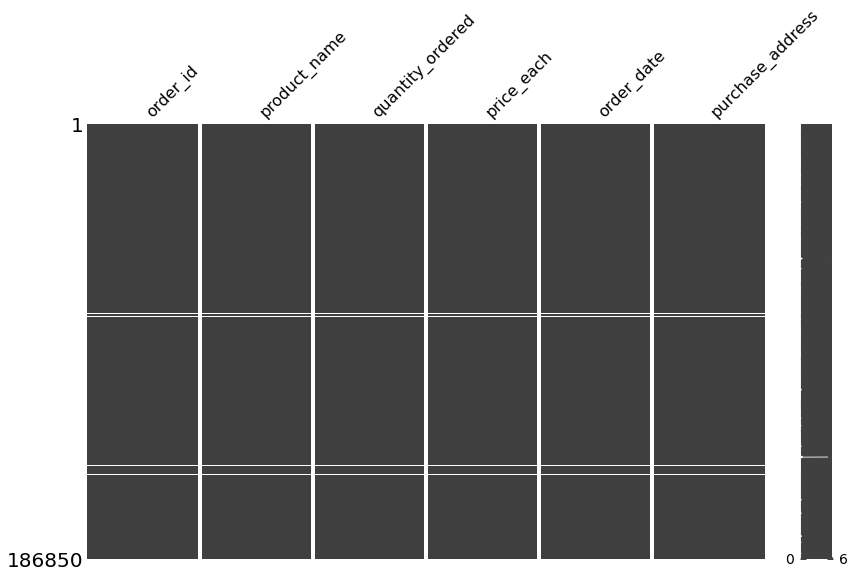

In [20]:
# querying missing values using the missingno lib
import missingno as msno
%matplotlib inline
msno.matrix(df, figsize=(12,8));


The matrix plot shows that all columns have missing values in common rows

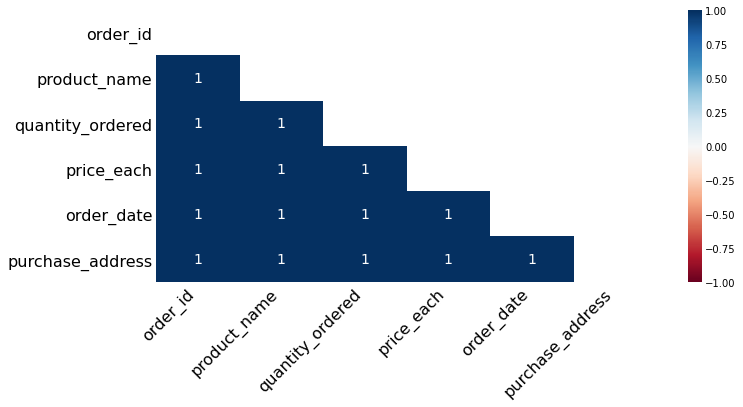

In [21]:
msno.heatmap(df, figsize=(10,5));

*The heatmap of missing values further confirms that all columns have missing values in same rows. It is therefore safo to drop all such rows*

In [22]:
# querying the rows of missing values
missing = df[df.isnull().any(axis=1)]

In [23]:
missing

,order_id,product_name,quantity_ordered,price_each,order_date,purchase_address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8596,NaN,NaN,NaN,NaN,NaN,NaN
8623,NaN,NaN,NaN,NaN,NaN,NaN
9144,NaN,NaN,NaN,NaN,NaN,NaN
9631,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# dropping missing values
df.dropna(how='any', inplace=True)

In [25]:
# checking if all missing values have been removed
df.isna().any()

order_id            False
product_name        False
quantity_ordered    False
price_each          False
order_date          False
purchase_address    False
dtype: bool

In [27]:
# checking for duplicated values
df.duplicated().sum()

618

*there are 618 duplicated values in the data. It's necessary to check where these duplicates occur*

In [28]:
# checking for rows of duplicated values
df.loc[df.duplicated(), :]

,order_id,product_name,quantity_ordered,price_each,order_date,purchase_address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1735,297311,Bose SoundSport Headphones,1,99.99,12/07/19 07:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/04/19 15:57,"482 8th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
8470,149308,Apple Airpods Headphones,1,150,01/02/19 23:07,"351 Madison St, New York City, NY 10001"
8690,149515,USB-C Charging Cable,1,11.95,01/14/19 21:19,"913 10th St, Los Angeles, CA 90001"
8923,149738,USB-C Charging Cable,1,11.95,01/11/19 11:22,"612 West St, New York City, NY 10001"
9311,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [31]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().any()

False

In [34]:
# checking dtype
df.dtypes

order_id            object
product_name        object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

#### TODOS:
  - query quantity_ordered and price_each to know why they are typed as 'object'
  - convert both to int64 and float64 dtypes respectively
  - explore and convert order_date to datetime64 
  

In [35]:
# checking quantity_ordered
df.quantity_ordered.unique() 

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
      dtype=object)

In [36]:
# checking for where the value of quantity ordered is 'Quantity Ordered'
df.query("quantity_ordered == 'Quantity Ordered'")

,order_id,product_name,quantity_ordered,price_each,order_date,purchase_address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [39]:
# dropping the invalid row
df.drop(index=254, axis=0, inplace=True)

In [40]:
df.query("quantity_ordered == 'Quantity Ordered'")

,order_id,product_name,quantity_ordered,price_each,order_date,purchase_address


In [41]:
# converting quantity_ordered to int64
df.quantity_ordered = df.quantity_ordered.astype('int64')

In [42]:
df.quantity_ordered.dtype

dtype('int64')

In [43]:
# checking price_each
df.price_each.unique()

array(['1700', '600.0', '11.95', '149.99', '3.84', '99.99', '2.99',
       '999.99', '14.95', '600', '11.99', '150', '400', '700', '109.99',
       '379.99', '300', '389.99', '150.0', '700.0', '400.0', '300.0',
       '1700.0'], dtype=object)

In [44]:
# change dtype to float64
df.price_each = df.price_each.astype('float64')

In [45]:
df.price_each.dtype

dtype('float64')

In [46]:
# rename price_each
df.rename(columns = {'price_each':'unit_price'}, inplace=True)

In [47]:
df.columns

Index(['order_id', 'product_name', 'quantity_ordered', 'unit_price',
       'order_date', 'purchase_address'],
      dtype='object')

In [49]:
# converting order_date to datetime
df.order_date = pd.to_datetime(df['order_date'], format='%m/%d/%y %H:%M', dayfirst=True)

In [50]:
df.order_date.dtype

dtype('<M8[ns]')

In [51]:
# renaming order_date to date
df.rename(columns={'order_date':'date'}, inplace=True)

In [52]:
# checking cleaned df
df.head(3)

,order_id,product_name,quantity_ordered,unit_price,date,purchase_address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185675 non-null  object        
 1   product_name      185675 non-null  object        
 2   quantity_ordered  185675 non-null  int64         
 3   unit_price        185675 non-null  float64       
 4   date              185675 non-null  datetime64[ns]
 5   purchase_address  185675 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [59]:
# saving a copy of cleaned df
df.to_csv('cleaned_sales.csv', index=False)


### Some Feature Engineering:

##### TODOS:-
  - extract the months from the date column
  - calculate the final price of each product
  - extract state and post codes from address


In [83]:
df.insert(5, 'month', df['date'].dt.month)

In [84]:
df.head(2)

,order_id,product_name,quantity_ordered,unit_price,date,month,dow,total_price,street,state,postal_code
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,12,Monday,1700.0,136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,12,Sunday,600.0,562 2nd St,New York City,NY 10001


In [60]:
# extracting day of week
df.insert(6, 'dow', df['date'].dt.day_name())

In [61]:
# extracting the state, postal code, from purchase
df[['street', 'state', 'postal_code']] =  df['purchase_address'].str.split(",", expand=True)

In [62]:
df.head(3)

,order_id,product_name,quantity_ordered,unit_price,date,month,dow,purchase_address,street,state,postal_code
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,Monday,"136 Church St, New York City, NY 10001",136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,12,Sunday,"562 2nd St, New York City, NY 10001",562 2nd St,New York City,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,12,Thursday,"277 Main St, New York City, NY 10001",277 Main St,New York City,NY 10001


In [63]:
# the purchase_address column can be dropped
df.drop('purchase_address', axis=1, inplace=True)

In [64]:
# calculating total price 
total_price = df.quantity_ordered * df.unit_price

In [65]:
# create total_price column
df.insert(7, 'total_price', total_price)

In [66]:
df.head(2)

,order_id,product_name,quantity_ordered,unit_price,date,month,dow,total_price,street,state,postal_code
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,12,Monday,1700.0,136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,12,Sunday,600.0,562 2nd St,New York City,NY 10001


In [85]:
df.month = df.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [68]:
#check the dtype of 'month'
df.month.dtype

dtype('O')

In [69]:
# save final sales data
df.to_csv('final_sales.csv', index=False)

### Exploratory Data Analysis

In [72]:
# checking summary statistics of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_ordered,185675.0,1.12,0.44,1.00,1.00,1.00,1.0,9.0
unit_price,185675.0,184.52,332.85,2.99,11.95,14.95,150.0,1700.0
total_price,185675.0,185.62,333.04,2.99,11.95,14.95,150.0,3400.0


In [73]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
order_id,185675,178426,160873,5
product_name,185675,19,USB-C Charging Cable,21859
month,185675,12,Dec,24944
dow,185675,7,Tuesday,27137
street,185675,46837,986 7th St,14
state,185675,9,San Francisco,44659
postal_code,185675,10,CA 94016,44659


In [74]:
df.columns.to_list()

['order_id',
 'product_name',
 'quantity_ordered',
 'unit_price',
 'date',
 'month',
 'dow',
 'total_price',
 'street',
 'state',
 'postal_code']

###### Sales Analysis:
Questions:
  - what is the total sales for the year?
  - what is the total sales per month?
  - how is the monthly sales trend?
  

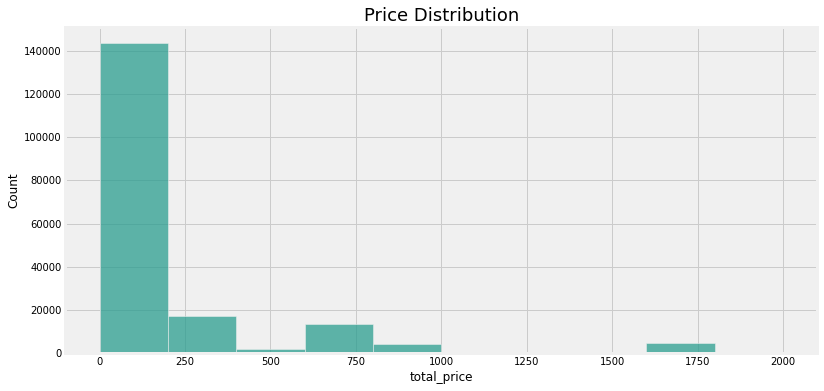

In [75]:
# ANALYSIS OF 'total_price'
plt.figure(figsize=(12,6))
plt.title('Price Distribution', size=18)
sns.histplot(x='total_price', data=df, bins=10, binrange=(0,2000));

*Most orders were made at less than $250*

In [76]:
np.round(df.total_price.sum())

34464532.0

*The company made a total sales of $34,464,532 in the given year*

### QUESTION:
In which month was the highest sales made?

In [87]:
month_pivot = df.pivot_table(values='total_price', index='month', aggfunc='sum').sort_values(by='total_price', ascending=True)

In [88]:
month_pivot

,total_price
month,
Jan,1.82e+06
Sept,2.09e+06
Feb,2.20e+06
Aug,2.24e+06
June,2.58e+06
July,2.65e+06
Mar,2.80e+06
May,3.15e+06
Nov,3.20e+06


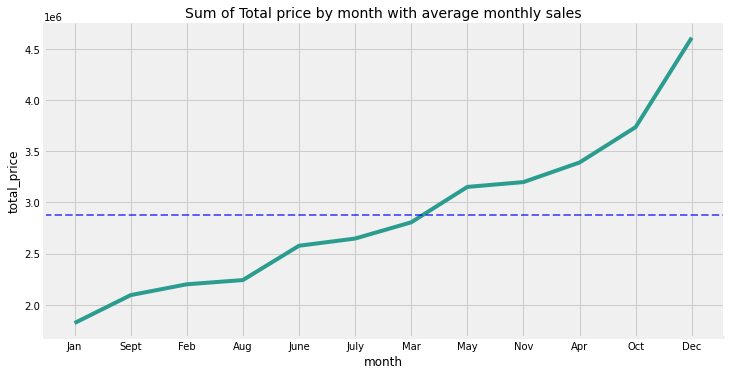

In [130]:

avg_monthly_sales = np.round(df.total_price.sum()/12)
sns.relplot(x = month_pivot.index, y='total_price', data=month_pivot, kind='line', height=5, aspect=2 )
plt.axhline(avg_monthly_sales, ls='--', linewidth=2, color='blue', alpha=0.6, label='average monthly sales:',)
plt.title('Sum of Total price by month with average monthly sales', size=14);

#### Observations:-
  - sales was highest in December and lowest in january. 
  - the dotted blue line represents the average monthly sales of $2,872,044
  - sales was above average in only 5 months - May, Nov, April, Oct, and December.

##### Sales vs Day of Week

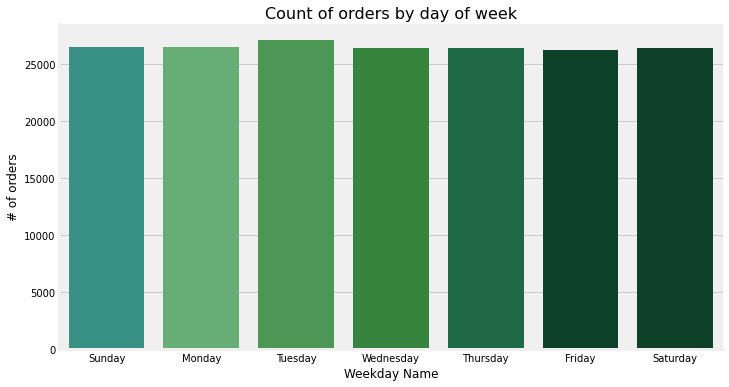

In [131]:
palette =['#2A9D8F', '#5BBA6F', '#3FA34D', '#2A9134', '#137547', '#054A29','#054A27']
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.catplot(x='dow',data=df, kind='count', height=5, aspect=2, palette= palette, order=order)
plt.title('Count of orders by day of week', size=16)
plt.xlabel('Weekday Name', fontsize=12)
plt.ylabel('# of orders', fontsize=12);

*There is a fairly equal distribution of the number of orders placed each day of the week.*

In [132]:
df_dow = df.groupby('dow', as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)

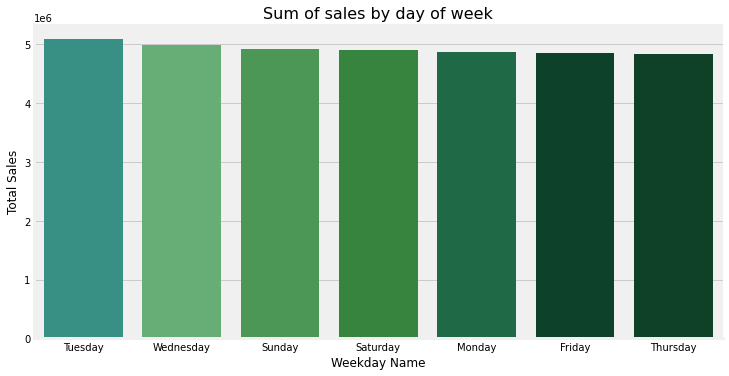

In [133]:
sns.catplot(x='dow', y='total_price', data=df_dow, kind='bar', palette=palette, height=5, aspect=2)
plt.title('Sum of sales by day of week', size=16)
plt.xlabel('Weekday Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12);

*Despite most sales happening on Tuesdays, there is really no much difference in the amount of sales for each day of the week.*

In [143]:
df.columns

Index(['order_id', 'product_name', 'quantity_ordered', 'unit_price', 'date',
       'month', 'dow', 'total_price', 'street', 'state', 'postal_code'],
      dtype='object')

##### Product Analysis:
Questions:
  - which is the most frequently ordered product?
  - which products generated the highest and lowest sales
  -what is the popularity of the products by state?

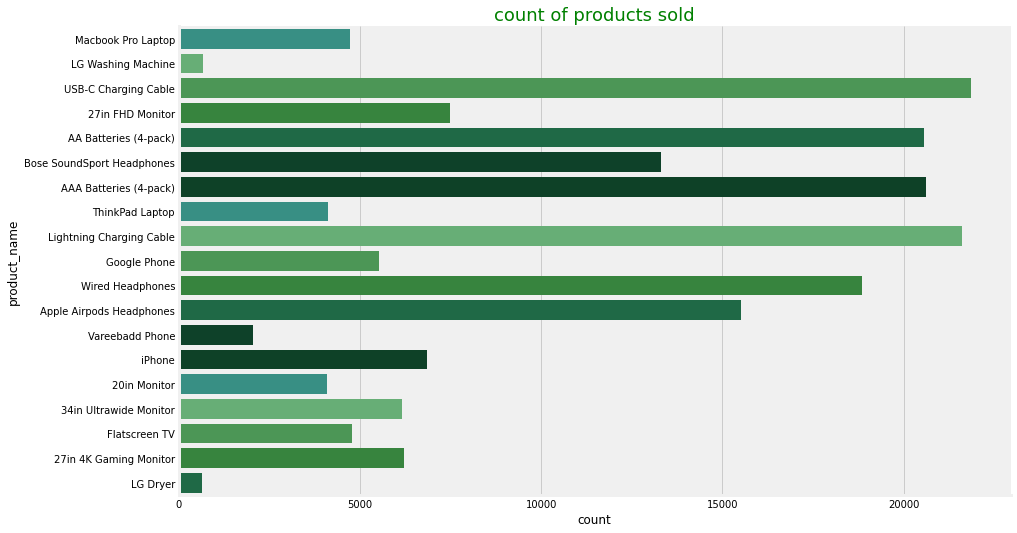

In [174]:
sns.catplot(y='product_name', data=df, kind='count', height=7, aspect=2, palette=palette)
plt.title('count of products sold', {'fontsize':18, 'color':'green'});

In [183]:
prod_sales = df.groupby('product_name', as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)

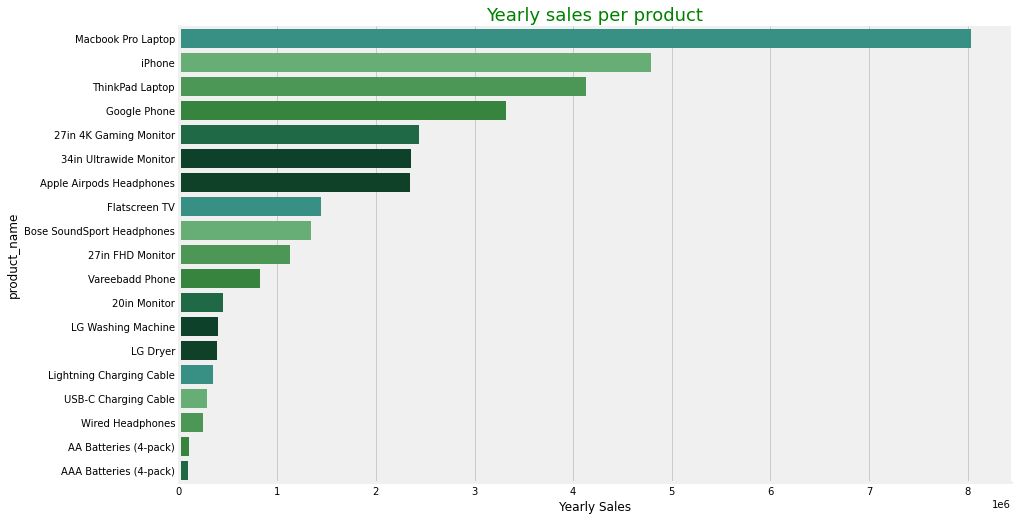

In [186]:
sns.catplot(y='product_name', x='total_price', data=prod_sales, kind='bar', height=7, aspect=2, palette=palette)
plt.title('Yearly sales per product', {'fontsize':18, 'color':'green'})
plt.xlabel('Yearly Sales');

*the Macbook Pro Laptop generated the most sales in th year.*

In [196]:
prod_state = df.pivot_table(values='total_price', index='product_name', columns='state', aggfunc='sum') #.sum().sort_values(by='total_price', ascending=False)

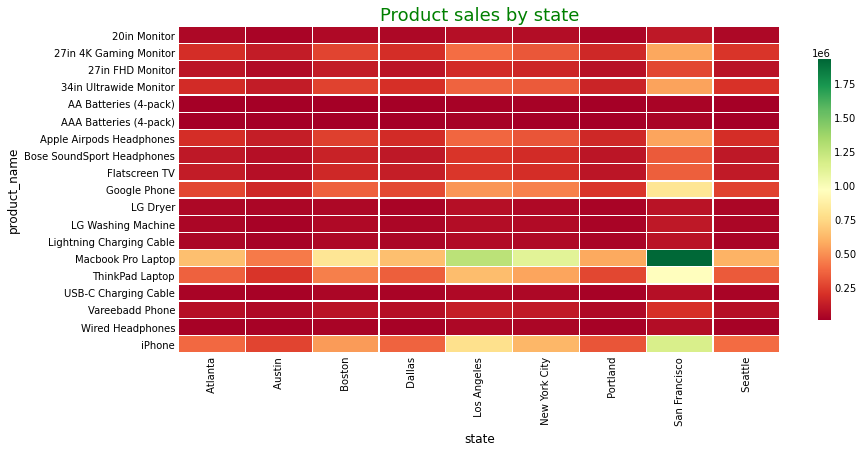

In [233]:
plt.figure(figsize=(12,6))
sns.heatmap(prod_state, cmap='RdYlGn', linewidths=0.3, linecolor='white', cbar_kws={"shrink": .8},)
plt.title('Product sales by state', {'fontsize':18, 'color':'green'});

#### Location Analysis:
Question:-
  - what is the sales trend per state ?
  


In [251]:
state_sales = df.groupby(['month', 'state'], as_index=False)['total_price'].sum()

In [250]:
state_sales.sum()

,month,state,total_price
0,Apr,Atlanta,284422.01
1,Apr,Austin,172683.59
2,Apr,Boston,353392.17
3,Apr,Dallas,251235.54
4,Apr,Los Angeles,550080.29
...,...,...,...
103,Sept,Los Angeles,354075.69
104,Sept,New York City,300001.88
105,Sept,Portland,132556.49
106,Sept,San Francisco,462870.03


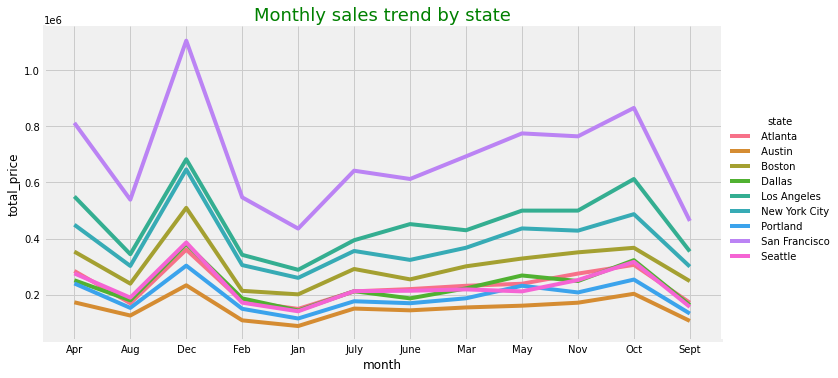

In [268]:
sns.relplot(x = 'month', y='total_price', data=state_sales, kind='line', hue='state', height=5, aspect=2 )
plt.title('Monthly sales trend by state', {'fontsize':18, 'color':'green'});

*there is roughly equal pattern in sales seasonality across all states, with peaks in December and dips in January.*

In [262]:
stategrp = df.groupby('state', as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)

In [ ]:
stategrp

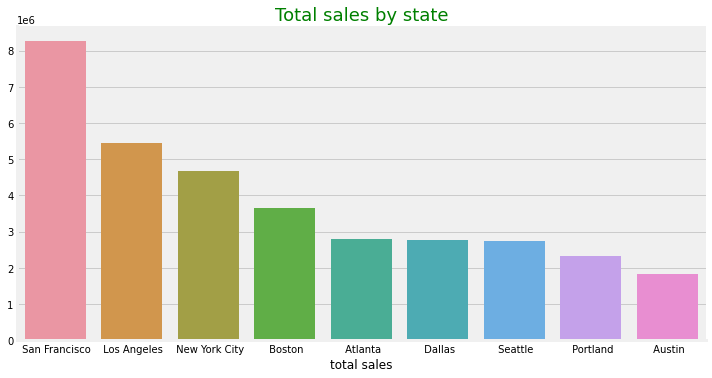

In [267]:
sns.catplot(x='state', y='total_price', data=stategrp, kind='bar', height=5, aspect=2, ci=None)
plt.xlabel('total sales')
plt.ylabel('')
plt.title('Total sales by state', {'fontsize':18, 'color':'green'});

### CONCLUSION:
  - The company made a total sales of $34,464,532 in the given year
  - Most sales was made in Decemeber, while January was the worst state for business
  - Sales was above monthly average in only 5 months of the year - May, Nov, April, Oct, and December
  - Most sales came from San francisco, Austin was not performing well in terms of sales